# DS1000B Rigol Waveform Examples

**Scott Prahl**

**July 2021**

This notebook illustrates shows how to extract signals from a `.wfm` file created by a the Rigol DS1204B scope.  

*If RigolWFM is not installed, uncomment the following cell (i.e., delete the #) and run (shift-enter)*

In [1]:
#!pip install --user RigolWFM

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

try:
    import RigolWFM.wfm as rigol
except ModuleNotFoundError:
    print('RigolWFM not installed. To install, uncomment and run the cell above.')
    print('Once installation is successful, rerun this cell again.')

repo = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/"


A list of Rigol scopes in the DS1000B family is:

In [3]:
print(rigol.DS1000B_scopes[:])

['B', '1000B', 'DS1000B', 'DS1074B', 'DS1104B', 'DS1204B']


## DS1204B-A

We will start with a `.wfm` file from a Rigol DS1204B scope. 

<img src="https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1204B-A.bmp" width="50%">



### Now for the `.wfm` data

First a textual description.

In [20]:
# raw=true is needed because this is a binary file
wfm_url = repo + "DS1204B-A.wfm?raw=true"  
w = rigol.Wfm.from_url(wfm_url, '1000B')

description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1204B-A.wfm?raw=true'
    General:
        File Model   = wfm1000b
        User Model   = 1000B
        Parser Model = wfm1000b
        Firmware     = unknown
        Filename     = DS1204B-A.wfm
        Channels     = [1, 2, 3, 4]

     Channel 1:
         Coupling =  unknown
            Scale =     1.00  V/div
           Offset =    -2.52  V
            Probe =       1X
         Inverted =    False

        Time Base =    2.000 ms/div
           Offset =    0.000  s
            Delta =    8.000 µs/point
           Points =     8192

         Count    = [        1,        2,        3  ...      8191,     8192]
           Raw    = [       86,       86,       86  ...       163,      163]
           Times  = [-32.768 ms,-32.760 ms,-32.752 ms  ... 32.760 ms,32.768 ms]
           Volts  = [  3.04  V,  3.04  V,  3.04  V  ... -40.00 mV,-40.00 mV]

     Channel 2:
         Coupling =  unknown
            Scale =     5.00  V/d

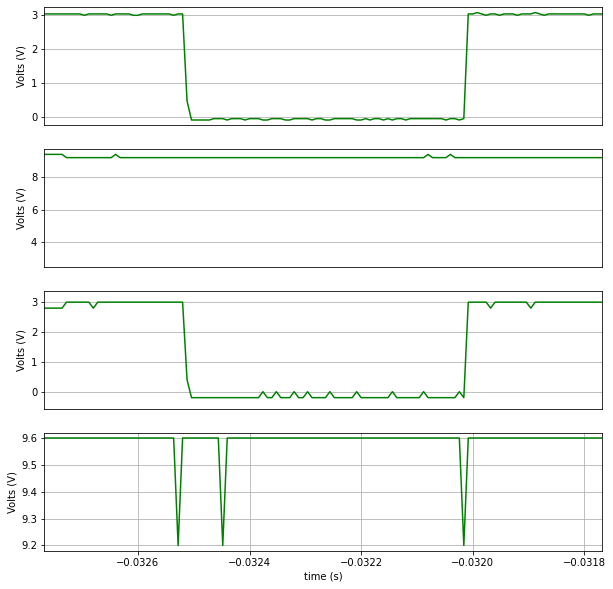

In [21]:
csv_file = "/Users/prahl/Documents/Code/git/RigolWFM/wfm/DS1204B-A-original.csv"

csv_data = np.genfromtxt(csv_file, delimiter=',', skip_header=2, encoding='latin1').T

plt.subplots(4,1,sharex=True,figsize=(10,10),subplot_kw=dict(frameon=False,xlim=(-0.001,0.001)))
plt.title("DS1204B from .csv file")

plt.subplot(411)
plt.plot(csv_data[0], csv_data[1], color='green')
plt.ylabel("Volts (V)")
plt.xlim(csv_data[0,0],csv_data[0,0]+0.001)
plt.xticks([])
plt.grid(True)

plt.subplot(412)
plt.plot(csv_data[0],csv_data[2], color='green')
plt.ylabel("Volts (V)")
plt.xlim(csv_data[0,0],csv_data[0,0]+0.001)
plt.xticks([])
plt.grid(True)

plt.subplot(413)
plt.plot(csv_data[0],csv_data[3], color='green')
plt.ylabel("Volts (V)")
plt.xlim(csv_data[0,0],csv_data[0,0]+0.001)
plt.xticks([])
plt.grid(True)

plt.subplot(414)
plt.plot(csv_data[0],csv_data[4], color='green')
plt.ylabel("Volts (V)")
plt.xlim(csv_data[0,0],csv_data[0,0]+0.001)
plt.xlabel("time (s)")
plt.grid(True)

#plt.xlim(center_time-0.6,center_time+0.6)

plt.show()

Plotting the .wfm results and the .csv values give us one single line.

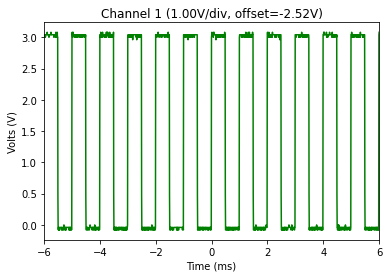

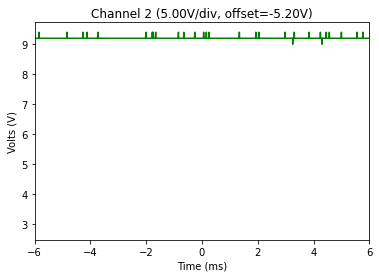

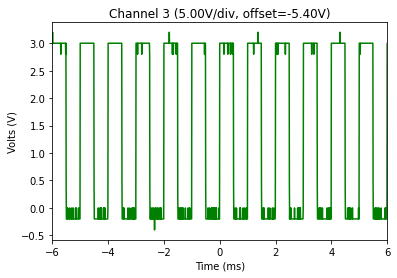

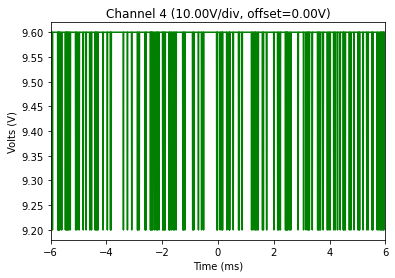

In [22]:
for ch in w.channels:
    if ch.enabled:
        plt.plot(ch.times*1000, ch.volts, color='green')
        plt.title("Channel %d (%.2fV/div, offset=%.2fV)"%(ch.channel_number,ch.volt_per_division,ch.volt_offset))
        plt.xlabel("Time (ms)")
        plt.ylabel("Volts (V)")
        plt.xlim(-6,6)
        plt.show()

Differences are all essentially zero!

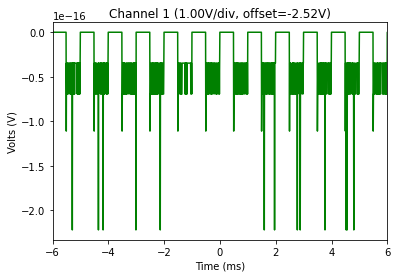

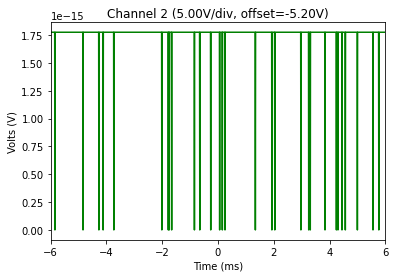

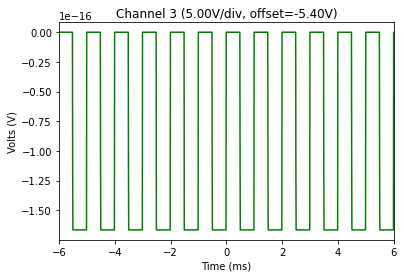

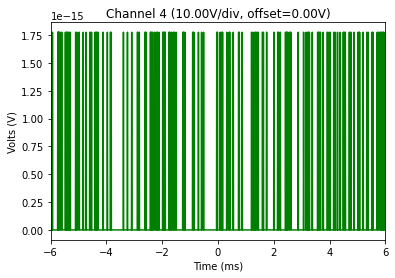

In [24]:
for i,ch in enumerate(w.channels):
    if ch.enabled:
        plt.plot(ch.times*1000, ch.volts-csv_data[i+1], color='green')
        plt.title("Channel %d (%.2fV/div, offset=%.2fV)"%(ch.channel_number,ch.volt_per_division,ch.volt_offset))
        plt.xlabel("Time (ms)")
        plt.ylabel("Volts (V)")
        plt.xlim(-6,6)
        plt.show()

## DS1204B-B

We will start with a `.wfm` file from a Rigol DS1204B scope. 

<img src="https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1204B-B.png" width="50%">

In [25]:
# raw=true is needed because this is a binary file
wfm_url = repo + "DS1204B-B.wfm?raw=true"  
w = rigol.Wfm.from_url(wfm_url, '1000B')

description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1204B-B.wfm?raw=true'
    General:
        File Model   = wfm1000b
        User Model   = 1000B
        Parser Model = wfm1000b
        Firmware     = unknown
        Filename     = DS1204B-B.wfm
        Channels     = [1]

     Channel 1:
         Coupling =  unknown
            Scale =    10.00  V/div
           Offset =     0.00  V
            Probe =      10X
         Inverted =    False

        Time Base =    1.000 ms/div
           Offset =    0.000  s
            Delta =    4.000 µs/point
           Points =     8192

         Count    = [        1,        2,        3  ...      8191,     8192]
           Raw    = [      138,      138,      138  ...        60,       60]
           Times  = [-16.384 ms,-16.380 ms,-16.376 ms  ... 16.380 ms,16.384 ms]
           Volts  = [-15.60  V,-15.60  V,-15.60  V  ...  15.60  V, 15.60  V]




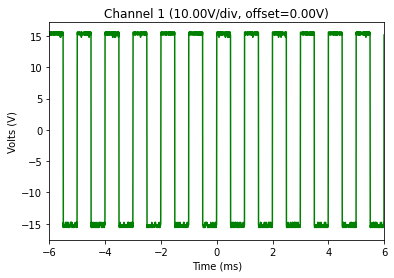

In [26]:
for ch in w.channels:
    if ch.enabled:
        plt.plot(ch.times*1000, ch.volts, color='green')
        plt.title("Channel %d (%.2fV/div, offset=%.2fV)"%(ch.channel_number,ch.volt_per_division,ch.volt_offset))
        plt.xlabel("Time (ms)")
        plt.ylabel("Volts (V)")
        plt.xlim(-6,6)
        plt.show()

## DS1204B-C

We will start with a `.wfm` file from a Rigol DS1204B scope. 

<img src="https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1204B-C.png" width="50%">



In [27]:
# raw=true is needed because this is a binary file
wfm_url = repo + "DS1204B-C.wfm?raw=true"  
w = rigol.Wfm.from_url(wfm_url, '1000B')

description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1204B-C.wfm?raw=true'
    General:
        File Model   = wfm1000b
        User Model   = 1000B
        Parser Model = wfm1000b
        Firmware     = unknown
        Filename     = DS1204B-C.wfm
        Channels     = [2]

     Channel 2:
         Coupling =  unknown
            Scale =    10.00  V/div
           Offset =     0.00  V
            Probe =      10X
         Inverted =    False

        Time Base =    1.000 ms/div
           Offset =    0.000  s
            Delta =    4.000 µs/point
           Points =     8192

         Count    = [        1,        2,        3  ...      8191,     8192]
           Raw    = [       61,       61,       61  ...        62,       62]
           Times  = [-16.384 ms,-16.380 ms,-16.376 ms  ... 16.380 ms,16.384 ms]
           Volts  = [ 15.20  V, 15.20  V, 15.20  V  ...  14.80  V, 14.80  V]




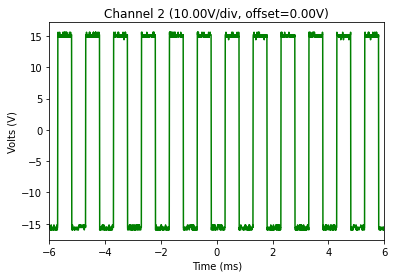

In [28]:
for ch in w.channels:
    if ch.enabled:
        plt.plot(ch.times*1000, ch.volts, color='green')
        plt.title("Channel %d (%.2fV/div, offset=%.2fV)"%(ch.channel_number,ch.volt_per_division,ch.volt_offset))
        plt.xlabel("Time (ms)")
        plt.ylabel("Volts (V)")
        plt.xlim(-6,6)
        plt.show()

## DS1204B-D

We will start with a `.wfm` file from a Rigol DS1204B scope. 

<img src="https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1204B-D.png" width="50%">



In [29]:
# raw=true is needed because this is a binary file
wfm_url = repo + "DS1204B-D.wfm?raw=true"  
w = rigol.Wfm.from_url(wfm_url, '1000B')

description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1204B-D.wfm?raw=true'
    General:
        File Model   = wfm1000b
        User Model   = 1000B
        Parser Model = wfm1000b
        Firmware     = unknown
        Filename     = DS1204B-D.wfm
        Channels     = [3]

     Channel 3:
         Coupling =  unknown
            Scale =     5.00  V/div
           Offset =     0.00  V
            Probe =      10X
         Inverted =    False

        Time Base =    1.000 ms/div
           Offset =    0.000  s
            Delta =    4.000 µs/point
           Points =     8192

         Count    = [        1,        2,        3  ...      8191,     8192]
           Raw    = [      175,      175,      175  ...       175,      175]
           Times  = [-16.384 ms,-16.380 ms,-16.376 ms  ... 16.380 ms,16.384 ms]
           Volts  = [-15.20  V,-15.20  V,-15.20  V  ... -15.20  V,-15.20  V]




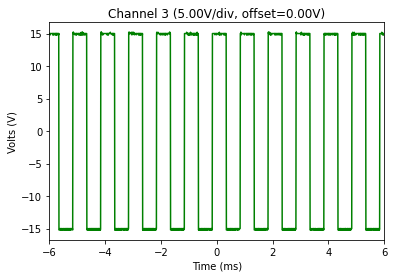

In [30]:
for ch in w.channels:
    if ch.enabled:
        plt.plot(ch.times*1000, ch.volts, color='green')
        plt.title("Channel %d (%.2fV/div, offset=%.2fV)"%(ch.channel_number,ch.volt_per_division,ch.volt_offset))
        plt.xlabel("Time (ms)")
        plt.ylabel("Volts (V)")
        plt.xlim(-6,6)
        plt.show()

## DS1204B-E

We will start with a `.wfm` file from a Rigol DS1204B scope. 

<img src="https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1204B-E.png" width="50%">



In [31]:
# raw=true is needed because this is a binary file
wfm_url = repo + "DS1204B-E.wfm?raw=true"  
w = rigol.Wfm.from_url(wfm_url, '1000B')

description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1204B-E.wfm?raw=true'
    General:
        File Model   = wfm1000b
        User Model   = 1000B
        Parser Model = wfm1000b
        Firmware     = unknown
        Filename     = DS1204B-E.wfm
        Channels     = [4]

     Channel 4:
         Coupling =  unknown
            Scale =     5.00  V/div
           Offset =     0.00  V
            Probe =      10X
         Inverted =    False

        Time Base =    1.000 ms/div
           Offset =    0.000  s
            Delta =    4.000 µs/point
           Points =     8192

         Count    = [        1,        2,        3  ...      8191,     8192]
           Raw    = [      174,      174,      174  ...        25,       25]
           Times  = [-16.384 ms,-16.380 ms,-16.376 ms  ... 16.380 ms,16.384 ms]
           Volts  = [-15.00  V,-15.00  V,-15.00  V  ...  14.80  V, 14.80  V]




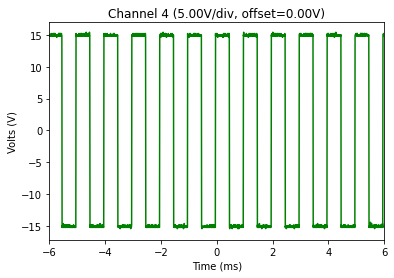

In [32]:
for ch in w.channels:
    if ch.enabled:
        plt.plot(ch.times*1000, ch.volts, color='green')
        plt.title("Channel %d (%.2fV/div, offset=%.2fV)"%(ch.channel_number,ch.volt_per_division,ch.volt_offset))
        plt.xlabel("Time (ms)")
        plt.ylabel("Volts (V)")
        plt.xlim(-6,6)
        plt.show()